### Xgboost, state-of-the-art ensemble method for sparse data

Xgboost is one of the latest iterations of gradient boosting algorithms, with many optimisations compared to other gradient boosting algorithms.  
https://xgboost.readthedocs.io/en/latest/

#### Libraries
*Pandas* and *Numpy* for data processing.  
*Scipy* and *Statsmodels* for statistical analysis.
*Matplotlib* for plotting.  

In [60]:
import xgboost
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shap
import scipy.stats as ss
import statsmodels.api as sm

Own-made function to check the normality of a dataset. Draws a histogram and above that a normal curve. Calculates also the Kolmogorov-Smirnov statistic of the dataset.

In [61]:
# Function to check normality
def check_normality(data,bins=50):
    mask = ~np.isnan(data)
    temp1 = data[mask]
    x = np.linspace(np.percentile(temp1,1),np.percentile(temp1,99),100)
    plt.hist(temp1, density=True,bins=bins)
    plt.plot(x,ss.norm.pdf(x,np.mean(temp1),np.std(temp1)))
    print("Kolmogorov-Smirnov: " + str(sm.stats.diagnostic.kstest_normal(temp1)))

In [62]:
# Different folders, depending which computer I am using
#path = "C:/Users/mran/OneDrive - University of Vaasa/Data\TobinQ_Board/"
#path = "C:/Users/mikko/OneDrive - University of Vaasa/Data\TobinQ_Board/"
path = "E:/Onedrive_uwasa/OneDrive - University of Vaasa/Data\TobinQ_Board/"
os.chdir(path)

Data preparation, which includes:  
* Loading data from a csv-file
* Remove missing y-values
* Abnormal Tobin Q to the y_df dataframe
* Board characteristic variables to the x_df dataframe
* Winsorizing data, meaning that change the most extreme values to 1 % and 99 % percentile values.

In [63]:
# Prepare data.
errors_df = pd.read_csv("AbnormalQ.csv",delimiter=";")
errors_df = errors_df.rename(columns = {'BOARD_GENDER_DIVERSITY_P' : 'BOARD_GENDER_DIVERSITY','BOARD_MEMBER_COMPENSATIO' : 'BOARD_MEMBER_COMPENSATION'})
# Remove missing abQ values
errors_df = errors_df.loc[~errors_df['ABN_TOBIN_POIKKILEIK'].isna()]
y_df = errors_df['ABN_TOBIN_POIKKILEIK']
x_df = errors_df[['BOARD_GENDER_DIVERSITY',
       'BOARD_MEETING_ATTENDANCE', 'BOARD_MEMBER_AFFILIATION',
       'BOARD_MEMBER_COMPENSATION', 'BOARD_SIZE',
       'CEO_BOARD_MEMBER', 'CHAIRMAN_IS_EX_CEO',
       'INDEPENDENT_BOARD_MEMBER',
       'NUMBER_OF_BOARD_MEETINGS',
       'AVERAGE_BOARD_TENURE']]
# Winsorize x-data
x_df_wins = x_df.clip(lower=x_df.quantile(0.01), upper=x_df.quantile(0.99), axis = 1)

Calculate the descriptive statistics of the x variables (board characteristics).

In [64]:
x_df.describe().transpose().to_clipboard()

In [65]:
# Convert data tto_clipboardost Dmatrix
dtrain = xgboost.DMatrix(x_df_wins, label=y_df, nthread = -1)

Series.base is deprecated and will be removed in a future version
Series.base is deprecated and will be removed in a future version


In [66]:
## Cross-validation. SKIP IF YOU HAVE A DECIDED YOUR PARAMETERS!

In [67]:
#param = {'max_depth': 1, 'eta': 0.9}
#param = {}
param = {'max_depth': 10, 'eta': 0.01, 'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 1}

In [68]:
temp = xgboost.cv(param,dtrain,num_boost_round=900,nfold=5,seed=10)

[<matplotlib.lines.Line2D at 0x1d165a28108>]

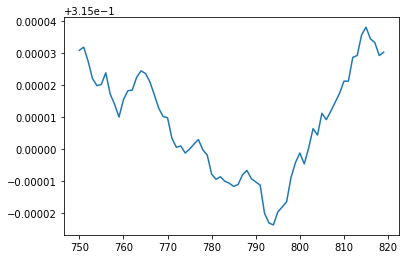

In [69]:
plt.plot(temp['test-rmse-mean'][750:820])

In [29]:
## 120 boosting rounds selected. Then the fine tuning of tree parameters.
b_rounds = 150
m_depth = 5
eta = 0.1
ssample = 0.8
col_tree = 0.8
m_child_w = 1
gam = 0.0

In [12]:
#from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Performing grid search

In [13]:
# Fine tune gamma

In [15]:
#param_test3 = {'gamma':[i/10.0 for i in range(0,40)]}
#super_param = {'gamma':[i/5.0 for i in range(0,11)],'min_child_weight':range(1,8,1),
#               'subsample':[i/20.0 for i in range(15,20)],'colsample_bytree':[i/20.0 for i in range(15,20)]}

In [16]:
#super_param

In [17]:
#gsearch3 = GridSearchCV(estimator = xgboost.XGBRegressor(njobs = -1, learning_rate = eta, n_estimators=b_rounds, max_depth=m_depth,
#     min_child_weight=m_child_w, gamma = gam, subsample=ssample, colsample_bytree=col_tree,objective='reg:squarederror',seed = 12),
#            n_jobs = -1, param_grid = param_test3,iid=False, cv=5)
#gsearch3 = GridSearchCV(estimator = xgboost.XGBRegressor(njobs = -1, learning_rate = eta, n_estimators=b_rounds, max_depth=m_depth,
#     min_child_weight=m_child_w, gamma = gam, subsample=ssample, colsample_bytree=col_tree,objective='reg:squarederror',seed = 12),
#            n_jobs = -1, param_grid = super_param,iid=False, cv=5)

In [18]:
#gsearch3.fit(x_df,y_df)

In [19]:
#gsearch3.best_params_

In [20]:
#gsearch3.best_score_

In [22]:
#gam = 2.0

In [23]:
# Fine tune max_depth and min_child_weight

In [51]:
#param_test1 = {'min_child_weight':range(1,9,1),'n_estimators':range(0,200,10)}
#param_test1 = {'max_depth':range(1,5,1),'min_child_weight':range(1,9,1)}
#param_test1 = {'max_depth':range(1,5,1)}
param_test1 = {'n_estimators':range(0,200,10)}

In [60]:
gsearch1 = GridSearchCV(estimator = xgboost.XGBRegressor(njobs = -1, learning_rate = eta, n_estimators=b_rounds, max_depth=m_depth,
     min_child_weight=m_child_w, gamma = gam,subsample=ssample, colsample_bytree=col_tree,objective='reg:squarederror', seed = 10),
        n_jobs = -1, param_grid = param_test1,iid=False, cv=5)

In [61]:
gsearch1.fit(x_df,y_df)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0.0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1, missing=None,
                                    n_estimators=150, n_jobs=1, njobs=-1,
                                    nthread=None, objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=10, silent=None,
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'n_estimators': range(0, 200, 10)},
             pre_dispatch='2*n_jobs', refit=

In [62]:
gsearch1.best_params_

{'n_estimators': 40}

In [63]:
gsearch1.best_score_

-0.00024709331025318804

In [33]:
m_child_w = 1
m_depth = 4

In [34]:
# Subsample and col_sample_bytree

In [20]:
param_test4 = {'subsample':[i/20.0 for i in range(15,20)],'colsample_bytree':[i/20.0 for i in range(15,20)]}

In [21]:
param_test4

{'subsample': [0.75, 0.8, 0.85, 0.9, 0.95],
 'colsample_bytree': [0.75, 0.8, 0.85, 0.9, 0.95]}

In [36]:
gsearch4 = GridSearchCV(estimator = xgboost.XGBRegressor(njobs = -1, learning_rate = eta, n_estimators=b_rounds, max_depth=m_depth,
     min_child_weight=m_child_w, gamma = gam, subsample=ssample, colsample_bytree=col_tree,objective='reg:squarederror', seed = 12),
            n_jobs = -1, param_grid = param_test4,iid=False, cv=10)

In [37]:
gsearch4.fit(x_df,y_df)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=2.0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=4,
                                    min_child_weight=1, missing=None,
                                    n_estimators=200, n_jobs=1, njobs=-1,
                                    nthread=None, objective='reg:squareder...
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.81, 0.82, 0.83, 0.84, 0.85,
                                              0.86, 0.87, 0.88, 0.89, 0.9, 0.91,
                                              0.92, 0.93, 0.94, 0.95, 0.96,
                         

In [38]:
gsearch4.best_params_

{'colsample_bytree': 0.86, 'subsample': 0.81}

In [39]:
gsearch4.best_score_

0.014519596373679144

In [40]:
ssample = 0.81
col_tree = 0.86

In [41]:
# Again optimizing learning rate and boosting rounds

In [27]:
b_rounds = 790
m_depth = 10
eta = 0.004
ssample = 0.8
col_tree = 0.8
m_child_w = 1
gam = 0

In [28]:
param = {'max_depth': m_depth, 'eta': eta, 'subsample': ssample, 'colsample_bytree': col_tree, 'min_child_weight' : m_child_w, 'gamma' : gam}

In [29]:
temp = xgboost.cv(param,dtrain,num_boost_round=2500,nfold=5,seed = 12)

[<matplotlib.lines.Line2D at 0x221353bbcc8>]

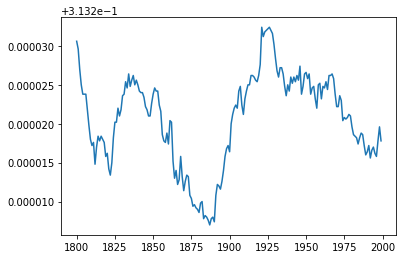

In [32]:
plt.plot(temp['test-rmse-mean'][1800:2000])

In [22]:
# BEST MODEL AT THE MOMENT
#b_rounds = 1880
#m_depth = 10
#eta = 0.004
#ssample = 0.8
#col_tree = 0.8
#m_child_w = 1
#gam = 0

In [5]:
# CONTINUE FROM HERE IF YOU HAVE DECIDED YOUR PARAMETERS.
#
# DO NOT CHANGE PARAMETERS ANY MORE! PUBLICATION MODEL!

The most difficult part in using xgboost for prediction is the tuning of hyperparameters. There is no good theory to guide parameter optimisation, and it is more dark magic than science. You can use grid-search approaches, but it needs A LOT of computing power. The tunable parameters are:  
* num_boost_round: The number of decision trees.
* max_depth: The depth of the trees.
* eta:
* subsample:

In [7]:
# Set parameters
b_rounds = 1880
m_depth = 10
eta = 0.004
ssample = 0.8
col_tree = 0.8
m_child_w = 1
gam = 0
param = {'max_depth': m_depth, 'eta': eta, 'subsample': ssample, 'colsample_bytree': col_tree, 'min_child_weight' : m_child_w, 'gamma' : gam}

In [8]:
# Train model
bst = xgboost.train(param,dtrain,num_boost_round=b_rounds)
bst.feature_names

['BOARD_GENDER_DIVERSITY',
 'BOARD_MEETING_ATTENDANCE',
 'BOARD_MEMBER_AFFILIATION',
 'BOARD_MEMBER_COMPENSATION',
 'BOARD_SIZE',
 'CEO_BOARD_MEMBER',
 'CHAIRMAN_IS_EX_CEO',
 'INDEPENDENT_BOARD_MEMBER',
 'NUMBER_OF_BOARD_MEETINGS',
 'AVERAGE_BOARD_TENURE']

Text(0, 0.5, 'Count')

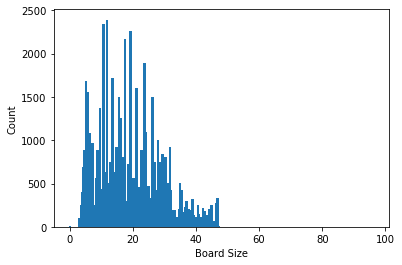

In [9]:
# Histogram of split points
split_bars = bst.get_split_value_histogram(feature='BOARD_GENDER_DIVERSITY',bins = None)
plt.bar(split_bars['SplitValue'],split_bars['Count'])
plt.xlabel('Board Size')
plt.ylabel('Count')
#plt.savefig('test.png',dpi=300)

In [57]:
# Average split point calculated using the above histograms
aver_split_points = []
for feat in bst.feature_names:
    split_bars = bst.get_split_value_histogram(feature=feat,as_pandas=False)
    temp = sum(split_bars[:,0]*split_bars[:,1])/(sum(split_bars[:,1]))
    aver_split_points.append(temp)
aver_df = pd.DataFrame()
aver_df['averages'] = aver_split_points
aver_df.to_clipboard()

<BarContainer object of 10 artists>

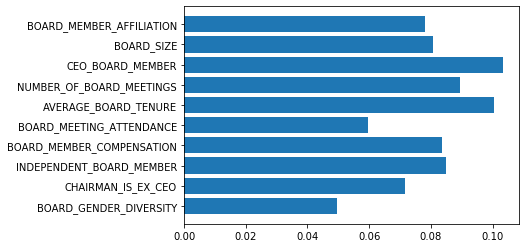

In [63]:
# Common boosting metrics
scores = bst.get_score(importance_type='gain')
relative_scores = [i/sum(list(scores.values())) for i in list(scores.values())]
plt.barh(list(scores.keys()),scores.values())

In [64]:
apu_df = pd.DataFrame()
apu_df['names'] = scores.keys()
apu_df['apu'] = scores.values()
apu_df.to_clipboard()

In [65]:
# SHAP analysis

In [66]:
j=0
shap.initjs()

In [67]:
# Calculate SHAP values
explainerXGB = shap.TreeExplainer(bst)
shap_values_XGB_test = explainerXGB.shap_values(x_df_wins,y_df,check_additivity = False)
#interaction_values = explainerXGB.shap_interaction_values(x_df_wins,y_df)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


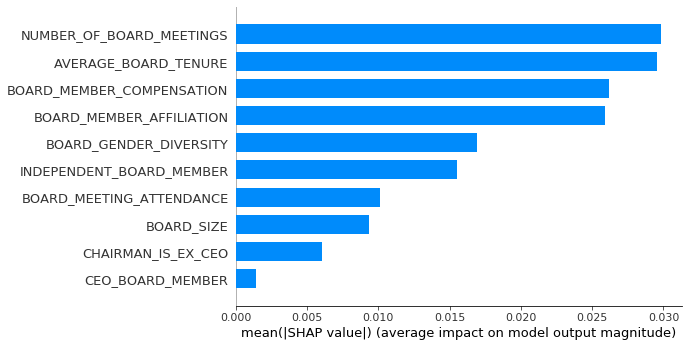

In [69]:
# Summary plot
shap.summary_plot(shap_values_XGB_test,x_df_wins,plot_type='bar')

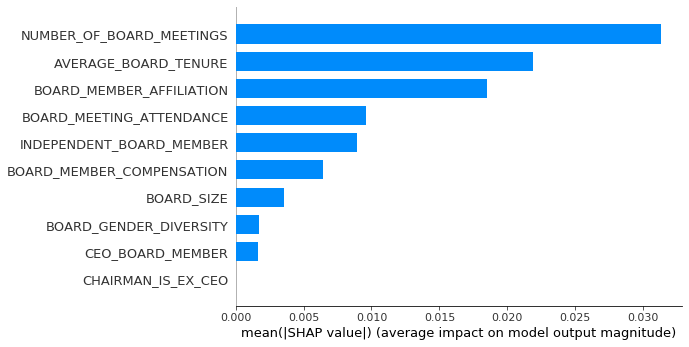

In [70]:
# Summary plot with removed NaN:s
mask = ~np.isnan(x_df_wins)
temp1 = np.ma.masked_array(shap_values_XGB_test,mask)
shap.summary_plot(temp1,x_df_wins,plot_type = 'bar')

In [18]:
bst.feature_names

['BOARD_GENDER_DIVERSITY',
 'BOARD_MEETING_ATTENDANCE',
 'BOARD_MEMBER_AFFILIATION',
 'BOARD_MEMBER_COMPENSATION',
 'BOARD_SIZE',
 'CEO_BOARD_MEMBER',
 'CHAIRMAN_IS_EX_CEO',
 'INDEPENDENT_BOARD_MEMBER',
 'NUMBER_OF_BOARD_MEETINGS',
 'AVERAGE_BOARD_TENURE']

Kolmogorov-Smirnov: (0.27429940551157517, 0.0)


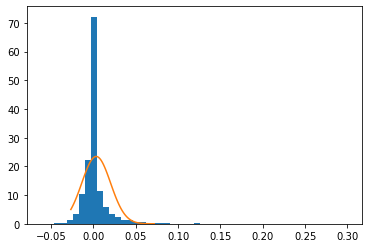

In [19]:
check_normality(shap_values_XGB_test[:,4])

In [20]:
# MEAN(ABS(SHAP))
shaps = np.mean(abs(shap_values_XGB_test), axis = 0)
names = bst.feature_names
apu_df = pd.DataFrame()
apu_df['names'] = names
apu_df['shaps'] = shaps
apu_df.to_clipboard()

In [21]:
x_df_wins.mean(axis = 0)

BOARD_GENDER_DIVERSITY       1.784510e+01
BOARD_MEETING_ATTENDANCE     7.903902e+01
BOARD_MEMBER_AFFILIATION     9.844969e-01
BOARD_MEMBER_COMPENSATION    2.291881e+06
BOARD_SIZE                   9.916234e+00
CEO_BOARD_MEMBER             9.838458e-01
CHAIRMAN_IS_EX_CEO           6.238009e-01
INDEPENDENT_BOARD_MEMBER     8.222103e+01
NUMBER_OF_BOARD_MEETINGS     7.864879e+00
AVERAGE_BOARD_TENURE         9.576410e+00
dtype: float64

<BarContainer object of 10 artists>

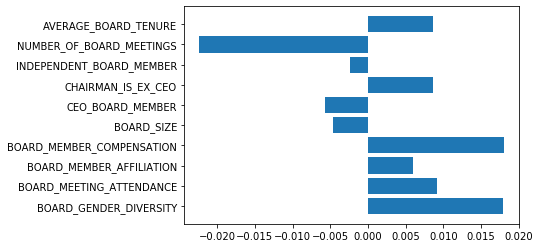

In [22]:
# Estimating direction of the effect. Notice that NaN are not affecting the results because of the multiplication in the process. Checked that.
stand_feats = (x_df_wins-x_df_wins.mean(axis = 0))/x_df_wins.std(axis = 0)
std_feat_times_shaps = np.multiply(shap_values_XGB_test,stand_feats)
dir_metric = np.mean(std_feat_times_shaps, axis = 0)
plt.barh(range(10),dir_metric,tick_label = bst.feature_names)

In [23]:
dir_metric.to_clipboard()

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [24]:
# Wilcoxon for feat times shaps. Is distribution symmetric around zero?
for feat in bst.feature_names:
    print(ss.wilcoxon(std_feat_times_shaps[feat]))

WilcoxonResult(statistic=2056166.0, pvalue=0.0)
WilcoxonResult(statistic=2494229.0, pvalue=0.0)
WilcoxonResult(statistic=2755892.0, pvalue=0.0)
WilcoxonResult(statistic=2068169.0, pvalue=0.0)
WilcoxonResult(statistic=3091151.0, pvalue=0.0)
WilcoxonResult(statistic=66977.0, pvalue=0.0)
WilcoxonResult(statistic=521457.0, pvalue=0.0)
WilcoxonResult(statistic=3469308.0, pvalue=0.0)
WilcoxonResult(statistic=1005378.0, pvalue=0.0)
WilcoxonResult(statistic=3144175.0, pvalue=0.0)


invalid value encountered in greater
invalid value encountered in less


In [25]:
# Correlation between SHAPs and feature values
ind = 0
apuri_df = pd.DataFrame()
apuri_name = list()
apuri_list = list()
for feature in bst.feature_names:
    mask = ~np.isnan(x_df_wins[feature])
    tau = ss.kendalltau(x_df_wins[feature][mask],shap_values_XGB_test[mask,ind])
    spear = ss.spearmanr(x_df_wins[feature][mask],shap_values_XGB_test[mask,ind])
    pears = ss.pearsonr(x_df_wins[feature][mask],shap_values_XGB_test[mask,ind])
    apuri_name.append(feature)
    apuri_list.append(tau)
    ind += 1
apuri_df['Name'] = apuri_name
apuri_df['Tau'] = apuri_list
apuri_df.to_clipboard()

In [26]:
# Significance of the effect using t-test (mean different from zero)
# HAVE TO DISCARD THIS.
t_values, p_values = ss.ttest_1samp(std_feat_times_shaps,popmean=0,axis=0,nan_policy='omit')
clip_table = pd.DataFrame()
clip_table['Names']= bst.feature_names
clip_table['Feat*SHAP']= dir_metric.values
clip_table['t-values']= t_values
clip_table['p-values']= p_values
clip_table.to_clipboard()

In [27]:
# Significance of the effect using linear regression between feature values and SHAP values
# HAVE TO DISCARD THIS BECAUSE THE P-VALUES DOES NOT MAKE SENSE. lEPTOKURTIC RESIDUALS EVEN AFTER LOG/SQRT TRANSFORMATIONS.

In [28]:
bst.feature_names

['BOARD_GENDER_DIVERSITY',
 'BOARD_MEETING_ATTENDANCE',
 'BOARD_MEMBER_AFFILIATION',
 'BOARD_MEMBER_COMPENSATION',
 'BOARD_SIZE',
 'CEO_BOARD_MEMBER',
 'CHAIRMAN_IS_EX_CEO',
 'INDEPENDENT_BOARD_MEMBER',
 'NUMBER_OF_BOARD_MEETINGS',
 'AVERAGE_BOARD_TENURE']

Kolmogorov-Smirnov: (0.06376430490934293, 3.01632400432609e-41)


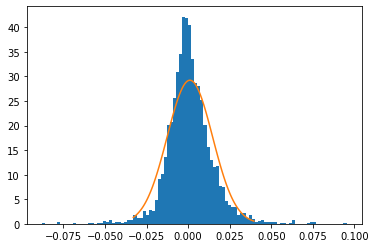

In [29]:
mask = ~np.isnan(x_df_wins['INDEPENDENT_BOARD_MEMBER'])
check = shap_values_XGB_test[mask,7]
check_normality(np.log(np.sqrt(np.add(check,1))),bins=100)

In [30]:
apu_df = pd.DataFrame()
slopes = []
t_values = []
p_values = []
ind = 0
for feature in bst.feature_names:
    mask = ~np.isnan(x_df_wins[feature].to_numpy().reshape(-1,1))
    temp1 = x_df_wins[feature].to_numpy().reshape(-1,1)[mask]
    temp1_const = sm.add_constant(temp1)
    temp2 = shap_values_XGB_test[:,ind].reshape(-1,1)[mask]
    reg = sm.OLS(np.log(np.add(temp2,1)),temp1_const)
    results = reg.fit()
    slopes.append(results.params[1])
    t_values.append(results.tvalues[1])
    p_values.append(results.pvalues[1])
    ind += 1
apu_df['Names'] = bst.feature_names
apu_df['Slopes'] = slopes
apu_df['t_values'] = t_values
apu_df['p_values'] = p_values
apu_df.to_clipboard()

In [31]:
mask = ~np.isnan(x_df_wins['BOARD_GENDER_DIVERSITY'].to_numpy().reshape(-1,1))
temp1 = x_df_wins['BOARD_GENDER_DIVERSITY'].to_numpy().reshape(-1,1)[mask]
temp1_const = sm.add_constant(temp1)
temp2 = shap_values_XGB_test[:,0].reshape(-1,1)[mask]
reg = sm.OLS(np.log(np.add(temp2,1)),temp1_const)

In [32]:
results = reg.fit()

In [33]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.266      
Dependent Variable: y                AIC:                -16263.3814
Date:               2020-01-29 11:55 BIC:                -16250.8666
No. Observations:   3856             Log-Likelihood:     8133.7     
Df Model:           1                F-statistic:        1401.      
Df Residuals:       3854             Prob (F-statistic): 8.20e-262  
R-squared:          0.267            Scale:              0.00086215 
----------------------------------------------------------------------
             Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const       -0.0234     0.0009   -24.9670   0.0000   -0.0252   -0.0215
x1           0.0017     0.0000    37.4291   0.0000    0.0016    0.0018
--------------------------------------------------------------------
Omnibus:              344.852       Durbin-Watson:          1.011   
Prob(Omnibus):        0.000         Jarque-Bera (JB):       1303.771
Skew:                 0.390         Prob(JB):               0.000   
Kurtosis:             5.739         Condition No.:          41      
====================================================================

"""

In [34]:
# Lowess curve preparation

In [35]:
temp_df = pd.DataFrame()

In [36]:
temp_df['data'] = x_df_wins['BOARD_MEMBER_COMPENSATION']
temp_df['shap'] = shap_values_XGB_test[:,3]

In [37]:
test_df = temp_df[~temp_df['data'].isna()]
test_df = test_df[(test_df['data'] < test_df['data'].quantile(0.99)) & (test_df['data'] > test_df['data'].quantile(0.01))]

In [38]:
lowess = sm.nonparametric.lowess(test_df['shap'],test_df['data'],frac = 0.3)

[<matplotlib.lines.Line2D at 0x1a625004f48>]

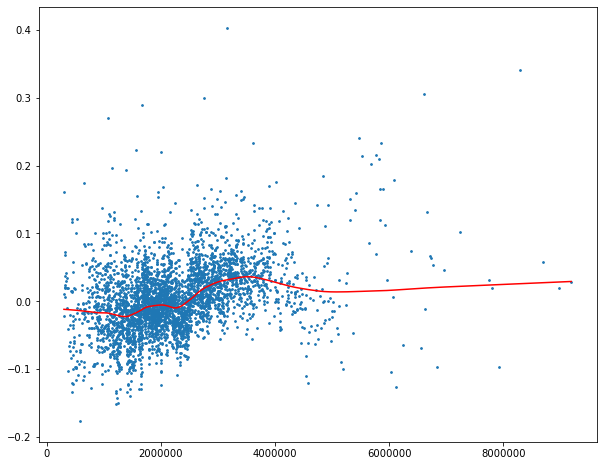

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(test_df['data'],test_df['shap'],s=3)
plt.plot(lowess[:,0], lowess[:,1],'r')

In [40]:
# GAM MODEL TESTING

In [41]:
from pygam import LinearGAM, s, f
from pygam.datasets import mcycle
X, y = mcycle(return_X_y=True)

In [42]:
test_df = temp_df[~temp_df['data'].isna()]

In [43]:
n_data = test_df['data'].to_numpy().reshape(3799,1)
n_shap = test_df['shap'].to_numpy().reshape(3799,1)

In [44]:
n_data

array([[ 298147.16],
       [ 298147.16],
       [1187079.  ],
       ...,
       [2667500.  ],
       [3191667.  ],
       [1098340.  ]])

In [45]:
gam = LinearGAM(n_splines=5).gridsearch(n_data,n_shap)
XX = gam.generate_X_grid(term=0, n=500)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


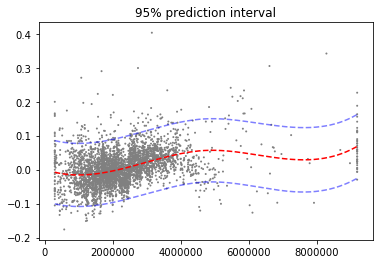

In [46]:
plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--',alpha = 0.5)
plt.scatter(n_data, n_shap, facecolor='gray', edgecolors='none',s=4)
plt.title('95% prediction interval');

In [47]:
gam = LinearGAM(s(0))

In [48]:
gam.gridsearch(X,y)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + intercept, tol=0.0001, 
   verbose=False)

[<matplotlib.lines.Line2D at 0x1a624908708>]

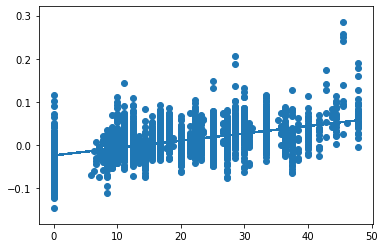

In [49]:
plt.scatter(x_df_wins['BOARD_GENDER_DIVERSITY'],shap_values_XGB_test[:,0])
plt.plot(x_df_wins['BOARD_GENDER_DIVERSITY'], results.params[0] + results.params[1]*x_df_wins['BOARD_GENDER_DIVERSITY'])

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


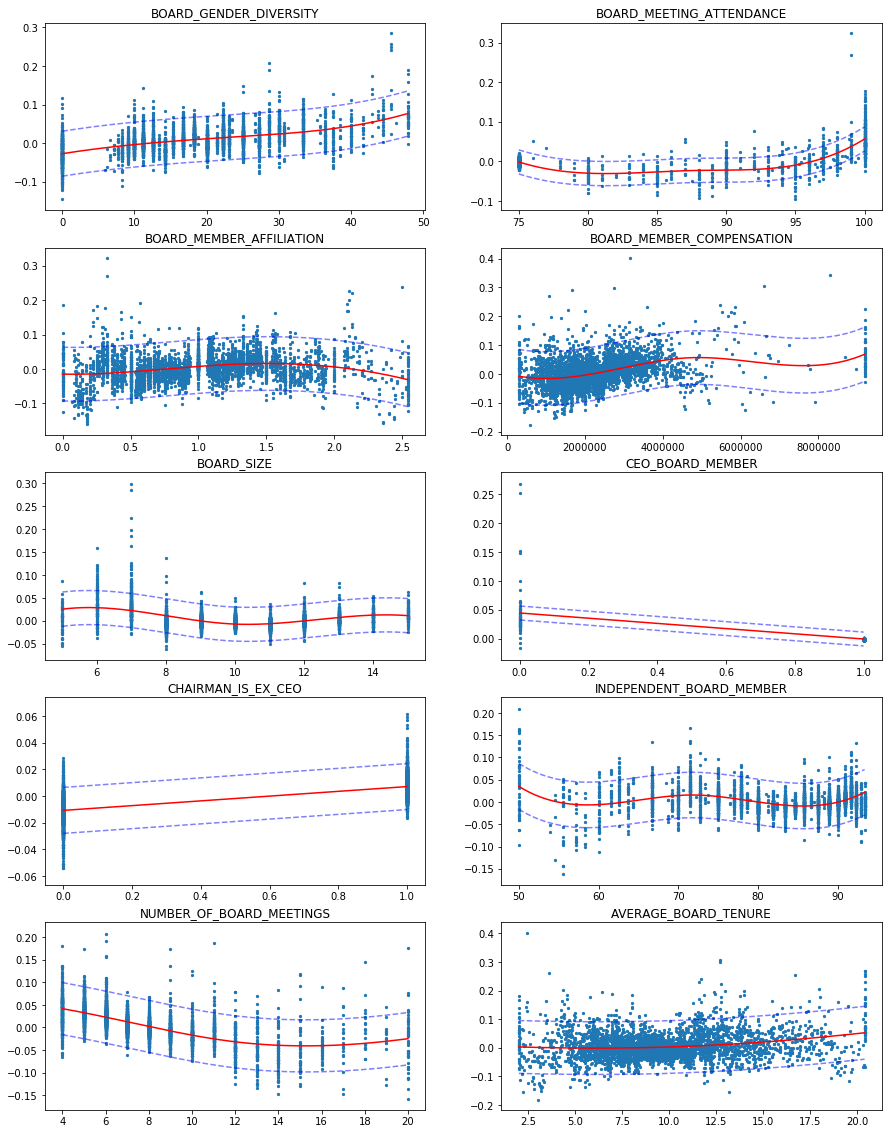

In [50]:
# Scatterplot matrix between SHAPS and feature values
fig, axs = plt.subplots(5,2,figsize=(15,20),squeeze=True)
ind = 0
for ax in axs.flat:
    feat = bst.feature_names[ind]
    temp_df = pd.DataFrame()
    temp_df['data'] = x_df_wins[feat]
    temp_df['shap'] = shap_values_XGB_test[:,ind]
    temp_df = temp_df[~temp_df['data'].isna()]
    n_data = temp_df['data'].to_numpy().reshape(len(temp_df['data']),1)
    n_shap = temp_df['shap'].to_numpy().reshape(len(temp_df['shap']),1)
    gam = LinearGAM(n_splines=5).gridsearch(n_data,n_shap)
    XX = gam.generate_X_grid(term=0, n=500)
    ax.scatter(x_df_wins[feat],shap_values_XGB_test[:,ind],s=5)
    ax.plot(XX, gam.predict(XX), 'r-')
    ax.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--',alpha = 0.5)
    ax.set_title(feat)
    ind+=1
plt.subplots_adjust(hspace=0.2)
plt.savefig('scatter_plots.png')

In [51]:
shap.approximate_interactions('BOARD_GENDER_DIVERSITY',shap_values_XGB_test,x_df)

array([7, 6, 2, 9, 4, 1, 8, 3, 5, 0], dtype=int64)

In [52]:
bst.feature_names

['BOARD_GENDER_DIVERSITY',
 'BOARD_MEETING_ATTENDANCE',
 'BOARD_MEMBER_AFFILIATION',
 'BOARD_MEMBER_COMPENSATION',
 'BOARD_SIZE',
 'CEO_BOARD_MEMBER',
 'CHAIRMAN_IS_EX_CEO',
 'INDEPENDENT_BOARD_MEMBER',
 'NUMBER_OF_BOARD_MEETINGS',
 'AVERAGE_BOARD_TENURE']

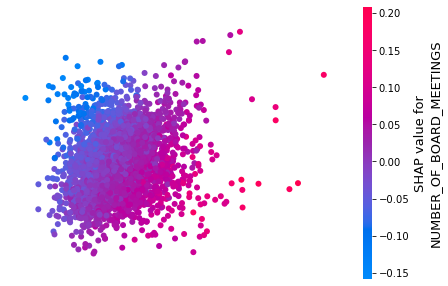

In [53]:
shap.embedding_plot('rank(0)',shap_values=shap_values_XGB_test,feature_names=list(x_df.columns))

In [54]:
# PREDICTIONS OF TAILS
bst.feature_names

['BOARD_GENDER_DIVERSITY',
 'BOARD_MEETING_ATTENDANCE',
 'BOARD_MEMBER_AFFILIATION',
 'BOARD_MEMBER_COMPENSATION',
 'BOARD_SIZE',
 'CEO_BOARD_MEMBER',
 'CHAIRMAN_IS_EX_CEO',
 'INDEPENDENT_BOARD_MEMBER',
 'NUMBER_OF_BOARD_MEETINGS',
 'AVERAGE_BOARD_TENURE']

In [56]:
predictions_df = pd.DataFrame()
f_names = []
max_mean = []
max_pvalues = []
min_mean = []
min_pvalues = []
mean_diff = []
diff_pvalues = []
for feat in bst.feature_names:
    gend_max = x_df_wins[x_df[feat] > x_df_wins[feat].quantile(0.75)]
    gend_min = x_df_wins[x_df[feat] < x_df_wins[feat].quantile(0.25)]
    gend_max_DM = xgboost.DMatrix(gend_max)
    gend_min_DM = xgboost.DMatrix(gend_min)
    pred_max = bst.predict(gend_max_DM)
    pred_min = bst.predict(gend_min_DM)
    _,diff_p_value = ss.ttest_ind(pred_max,pred_min,equal_var=False)
    _,max_p_value = ss.ttest_1samp(pred_max,0)
    _,min_p_value = ss.ttest_1samp(pred_min,0)
    f_names.append(feat)
    max_mean.append(np.mean(pred_max))
    max_pvalues.append(max_p_value)
    min_mean.append(np.mean(pred_min))
    min_pvalues.append(min_p_value)
    mean_diff.append(np.mean(pred_max)-np.mean(pred_min))
    diff_pvalues.append(diff_p_value)
predictions_df['Names'] = f_names
predictions_df['Diff'] = mean_diff
predictions_df['p_value_diff'] = diff_pvalues
predictions_df['Max_mean'] = max_mean
predictions_df['p_value_max'] = max_pvalues
predictions_df['Min_mean'] = min_mean
predictions_df['p_value_min'] = min_pvalues
predictions_df.to_clipboard()

Kolmogorov-Smirnov: (0.06440427795068793, 1.9981007580891727e-20)


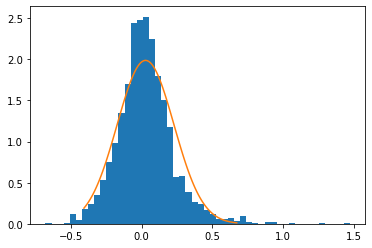

In [67]:
check_normality(pred_min)

(array([  1.,  11.,  25.,  87., 188., 402., 493., 370., 168.,  77.,  42.,
         12.,  13.,   7.,   4.,   0.,   1.,   0.,   1.,   1.]),
 array([-0.67869794, -0.5712514 , -0.46380484, -0.3563583 , -0.24891174,
        -0.14146519, -0.03401864,  0.07342792,  0.18087447,  0.28832102,
         0.39576757,  0.5032141 ,  0.6106607 ,  0.7181072 ,  0.8255538 ,
         0.9330003 ,  1.0404469 ,  1.1478934 ,  1.25534   ,  1.3627865 ,
         1.4702331 ], dtype=float32),
 <a list of 20 Patch objects>)

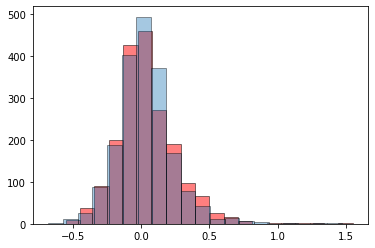

In [68]:
plt.hist(pred_max,bins = 20,alpha = 0.5,edgecolor = 'k',color = 'r')
plt.hist(pred_min,bins = 20,alpha = 0.4,edgecolor = 'k')

In [69]:
# Similar analysis for dummy features
gend_true = x_df[x_df['CEO_BOARD_MEMBER'] == 1]
gend_false = x_df[x_df['CEO_BOARD_MEMBER'] == 0]
gend_true_DM = xgboost.DMatrix(gend_true)
gend_false_DM = xgboost.DMatrix(gend_false)
pred_true = bst.predict(gend_true_DM)
pred_false = bst.predict(gend_false_DM)

(array([2., 2., 2., 7., 5., 7., 9., 7., 5., 3., 2., 1., 2., 2., 0., 1., 1.,
        2., 0., 2.]),
 array([-4.9078125e-01, -4.2064834e-01, -3.5051543e-01, -2.8038251e-01,
        -2.1024959e-01, -1.4011668e-01, -6.9983765e-02,  1.4915169e-04,
         7.0282064e-02,  1.4041498e-01,  2.1054789e-01,  2.8068081e-01,
         3.5081372e-01,  4.2094663e-01,  4.9107954e-01,  5.6121248e-01,
         6.3134539e-01,  7.0147830e-01,  7.7161121e-01,  8.4174412e-01,
         9.1187704e-01], dtype=float32),
 <a list of 20 Patch objects>)

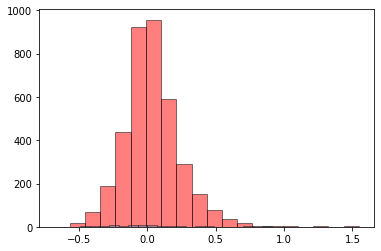

In [70]:
plt.hist(pred_true,bins = 20,alpha = 0.5,edgecolor = 'k',color = 'r')
plt.hist(pred_false,bins = 20,alpha = 0.4,edgecolor = 'k')

In [71]:
ss.ttest_ind(pred_true,pred_false,equal_var=False)

Ttest_indResult(statistic=-0.004383457586392389, pvalue=0.9965166236479484)

In [72]:
ss.ttest_1samp(pred_true,0)

Ttest_1sampResult(statistic=10.314318364161423, pvalue=1.2846862893515034e-24)

In [73]:
np.mean(pred_true)

0.034917098

In [74]:
np.mean(pred_false)

0.03509471

In [75]:
ss.ttest_1samp(pred_false,0)

Ttest_1sampResult(statistic=0.8691816104250094, pvalue=0.38815497320084513)

In [76]:
np.mean(pred_true)-np.mean(pred_false)

-0.00017761067

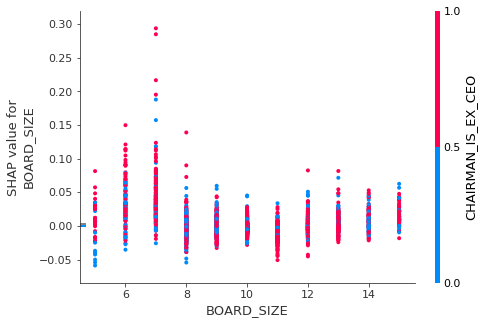

In [77]:
shap.dependence_plot('BOARD_SIZE',shap_values_XGB_test,x_df_wins)

In [78]:
# Features of the extreme cases

In [79]:
reset_y = y_df.reset_index()
reset_y = reset_y.drop('index',axis = 1)

In [80]:
short_names = ['GEND_DIV', 'MEET_ATT', 'MEMB_AFF', 'MEMB_COMP', 'SIZE', 'CEO_MEMB', 'CH_EX_CEO', 'IND_MEMB', 'NUMB_MEET', 'AVG_TEN']

In [81]:
shap.force_plot(explainerXGB.expected_value,shap_values_XGB_test[570,:],x_df_wins.iloc[570,:],feature_names=short_names)

In [82]:
reset_y[reset_y['ABN_TOBIN_POIKKILEIK'] > 1.85]

,ABN_TOBIN_POIKKILEIK
523,1.919329
600,1.945037
3806,1.910472
4387,2.229325


In [83]:
shap.force_plot(explainerXGB.expected_value,shap_values_XGB_test[3806,:],x_df_wins.iloc[3806,:],feature_names=short_names)

[<matplotlib.lines.Line2D at 0x204c1b36188>]

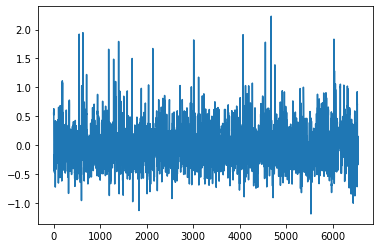

In [84]:
plt.plot(y_df)

In [85]:
y_df

0       0.553520
1       0.521962
2       0.630840
3       0.494130
4       0.318507
          ...   
6542   -0.229147
6543   -0.002537
6544    0.153509
6545   -0.112352
6546    0.000219
Name: ABN_TOBIN_POIKKILEIK, Length: 6142, dtype: float64